## Chapter 4 Lab

The following is from "An Introduction to Statistical Learning with Application in Python" by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, Jonathan Taylor

In [262]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [263]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [264]:
Smarket.columns # type: ignore

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='str')

In [265]:
# Calculate correlations for numeric columns only
Smarket.select_dtypes(include='number').corr() # type: ignore

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [266]:
print("Data types:")
print(Smarket.dtypes)
print("\nFirst few rows:")
print(Smarket.head())

Data types:
Year            int64
Lag1          float64
Lag2          float64
Lag3          float64
Lag4          float64
Lag5          float64
Volume        float64
Today         float64
Direction    category
dtype: object

First few rows:
   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


<Axes: >

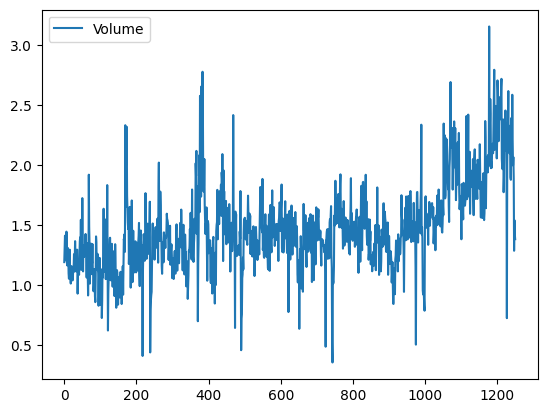

In [267]:
Smarket.plot(y='Volume')

In [268]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction =='Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [269]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [270]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [271]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [272]:
labels = np.array(['Down'] * 1250)
labels[probs>0.5] = 'Up'

In [273]:
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [274]:
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, np.float64(0.5216))

In [275]:
train =(Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [276]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [277]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [278]:
labels = np.array(['Down'] * 252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [279]:
np.mean(labels == L_test), np.mean(labels != L_test)

(np.float64(0.4801587301587302), np.float64(0.5198412698412699))

In [280]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down'] * 252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [281]:
(35+106)/252, 106/(106+76)

(0.5595238095238095, 0.5824175824175825)

In [282]:
newdata = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]});
newX = model.transform(newdata)
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

In [283]:
# LDA
lda = LDA(store_covariance=True)

In [284]:
X_train, X_test = [M.drop(columns='intercept') for M in (X_train, X_test)]
lda.fit(X_train, L_train)

,"solver solver: {'svd', 'lsqr', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'lsqr': Least squares solution. Can be combined with shrinkage or custom covariance estimator. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator... versionchanged:: 1.2 `solver=""svd""` now has experimental Array API support. See the :ref:`Array API User Guide ` for more details.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter.This should be left to None if `covariance_estimator` is used.Note that shrinkage works only with 'lsqr' and 'eigen' solvers.For a usage example, see:ref:`sphx_glr_auto_examples_classification_plot_lda.py`.",None
,"priors priors: array-like of shape (n_classes,), default=NoneThe class prior probabilities. By default, the class proportions areinferred from the training data.",None
,"n_components n_components: int, default=NoneNumber of components (<= min(n_classes - 1, n_features)) fordimensionality reduction. If None, will be set tomin(n_classes - 1, n_features). This parameter only affects the`transform` method.For a usage example, see:ref:`sphx_glr_auto_examples_decomposition_plot_pca_vs_lda.py`.",None
,"store_covariance store_covariance: bool, default=FalseIf True, explicitly compute the weighted within-class covariancematrix when solver is 'svd'. The matrix is always computedand stored for the other solvers... versionadded:: 0.17",True
,"tol tol: float, default=1.0e-4Absolute threshold for a singular value of X to be consideredsignificant, used to estimate the rank of X. Dimensions whosesingular values are non-significant are discarded. Only used ifsolver is 'svd'... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimatethe covariance matrices instead of relying on the empiricalcovariance estimator (with potential shrinkage).The object should have a fit method and a ``covariance_`` attributelike the estimators in :mod:`sklearn.covariance`.if None the shrinkage parameter drives the estimate.This should be left to None if `shrinkage` is used.Note that `covariance_estimator` works only with 'lsqr' and 'eigen'solvers... versionadded:: 0.24",None


In [285]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [286]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [287]:
lda.priors_

array([0.49198397, 0.50801603])

In [288]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [289]:
lda_pred = lda.predict(X_test)

In [290]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [291]:
lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up', 'Down') == lda_pred)

np.True_

In [292]:
np.all([lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred)

np.True_

In [293]:
np.sum(lda_prob[:, 0] > 0.9)

np.int64(0)

In [294]:
# QDA
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

,"solver solver: {'svd', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter. Enabling shrinkage is expected to improve the model when some classes have a relatively small number of training data points compared to the number of features by mitigating overfitting during the covariance estimation step.This should be left to `None` if `covariance_estimator` is used.Note that shrinkage works only with 'eigen' solver.",None
,"priors priors: array-like of shape (n_classes,), default=NoneClass priors. By default, the class proportions are inferred from thetraining data.",None
,"reg_param reg_param: float, default=0.0Regularizes the per-class covariance estimates by transforming S2 as``S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features)``,where S2 corresponds to the `scaling_` attribute of a given class.",0.0
,"store_covariance store_covariance: bool, default=FalseIf True, the class covariance matrices are explicitly computed andstored in the `self.covariance_` attribute... versionadded:: 0.17",True
,"tol tol: float, default=1.0e-4Absolute threshold for the covariance matrix to be considered rankdeficient after applying some regularization (see `reg_param`) to each`Sk` where `Sk` represents covariance matrix for k-th class. Thisparameter does not affect the predictions. It controls when a warningis raised if the covariance matrix is not full rank... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimate the covariancematrices instead of relying on the empirical covariance estimator(with potential shrinkage). The object should have a fit method anda ``covariance_`` attribute like the estimators in:mod:`sklearn.covariance`. If None the shrinkage parameter drives theestimate.This should be left to `None` if `shrinkage` is used.Note that `covariance_estimator` works only with the 'eigen' solver.",None


In [295]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [296]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [297]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [298]:
np.mean(qda_pred == L_test)

np.float64(0.5992063492063492)

In [299]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, L_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [300]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [301]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [302]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [303]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [304]:
X_train[L_train == 'Down'].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [305]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [306]:
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

In [307]:
# KNN
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [308]:
(83+43)/252, np.mean(knn1_pred == L_test)


(0.5, np.float64(0.5))

In [309]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

np.float64(0.5317460317460317)

In [310]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [311]:
348/5822

0.05977327378907592

In [312]:
feature_df = Caravan.drop(columns=['Purchase'])

In [313]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

In [314]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)
feature_std = pd.DataFrame(X_std, columns=feature_df.columns)
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [315]:
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)

In [316]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

(np.float64(0.111), np.float64(0.067))

In [317]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [318]:
9/(53+9)

0.14516129032258066

In [319]:
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    conf_table = confusion_table(knn_pred, y_test)
    predicted_to_rent = conf_table.loc['Yes'].sum()
    actual_to_rent = conf_table['Yes'].sum()
    print(f"""
          K={k}: # predicted to rent: {predicted_to_rent}, 
          # who did rent: {actual_to_rent}, 
          # # accuracy: {(conf_table.loc['Yes', 'Yes'] + conf_table.loc['No', 'No'])}/{len(y_test)}  # type: ignore
          # sensitivity: {conf_table.loc['Yes', 'Yes']}/{actual_to_rent}
          # specificity: {conf_table.loc['No', 'No']}/{len(y_test) - actual_to_rent})
          # precision: {conf_table.loc['Yes', 'Yes']}/{predicted_to_rent}
          """)
    


          K=1: # predicted to rent: 62, 
          # who did rent: 67, 
          # # accuracy: 889/1000  # type: ignore
          # sensitivity: 9/67
          # specificity: 880/933)
          # precision: 9/62
          

          K=2: # predicted to rent: 6, 
          # who did rent: 67, 
          # # accuracy: 929/1000  # type: ignore
          # sensitivity: 1/67
          # specificity: 928/933)
          # precision: 1/6
          

          K=3: # predicted to rent: 20, 
          # who did rent: 67, 
          # # accuracy: 919/1000  # type: ignore
          # sensitivity: 3/67
          # specificity: 916/933)
          # precision: 3/20
          

          K=4: # predicted to rent: 4, 
          # who did rent: 67, 
          # # accuracy: 929/1000  # type: ignore
          # sensitivity: 0/67
          # specificity: 929/933)
          # precision: 0/4
          

          K=5: # predicted to rent: 7, 
          # who did rent: 67, 
          # # accuracy: 928/1000

In [320]:
# Comparison to logistic regression
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:, 1] > 0.5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [321]:
logit_labels = np.where(logit_pred[:, 1] > 0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)
9/(20+9)


0.3103448275862069

In [322]:
Bike = load_data('Bikeshare')
Bike.shape, Bike.columns


((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='str'))

In [323]:
X = MS(['mnth', 'hr', 'workingday', 'weathersit']).fit_transform(Bike) # type: ignore
Y= Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-44.2263,5.130,-8.620,0.000
mnth[Feb],20.6257,4.249,4.855,0.000
mnth[March],37.6918,4.129,9.129,0.000
mnth[April],84.8534,4.140,20.494,0.000
mnth[May],132.6869,4.107,32.308,0.000
mnth[June],146.0290,4.149,35.195,0.000
mnth[July],134.0531,4.130,32.461,0.000
mnth[Aug],133.4196,4.142,32.213,0.000
mnth[Sept],132.2933,4.149,31.882,0.000
mnth[Oct],119.2849,4.112,29.008,0.000


In [324]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')


In [325]:
X2 = MS([mnth_encode, hr_encode, 'workingday', 'weathersit']).fit_transform(Bike) # type: ignore
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,148.4839,1.586,93.638,0.000
mnth[Jan],-91.7382,2.833,-32.385,0.000
mnth[Feb],-71.1125,2.902,-24.506,0.000
mnth[March],-54.0464,2.756,-19.609,0.000
mnth[April],-6.8848,2.774,-2.482,0.013
mnth[May],40.9487,2.726,15.022,0.000
mnth[June],54.2908,2.774,19.573,0.000
mnth[July],42.3149,2.751,15.380,0.000
mnth[Aug],41.6814,2.760,15.102,0.000
mnth[Sept],40.5550,2.790,14.536,0.000


In [326]:
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)


np.float64(5.092718668525611e-20)

In [327]:
np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)

True

In [328]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -91.7382
mnth[Feb]     -71.1125
mnth[March]   -54.0464
mnth[April]    -6.8848
mnth[May]      40.9487
mnth[June]     54.2908
mnth[July]     42.3149
mnth[Aug]      41.6814
mnth[Sept]     40.5550
mnth[Oct]      27.5467
mnth[Nov]       1.2504
Name: coef, dtype: float64

In [329]:
month = Bike['mnth'].dtype.categories # type: ignore
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])])
coef_month

mnth[Jan]     -91.7382
mnth[Feb]     -71.1125
mnth[March]   -54.0464
mnth[April]    -6.8848
mnth[May]      40.9487
mnth[June]     54.2908
mnth[July]     42.3149
mnth[Aug]      41.6814
mnth[Sept]     40.5550
mnth[Oct]      27.5467
mnth[Nov]       1.2504
mnth[Dec]     -24.8060
dtype: float64

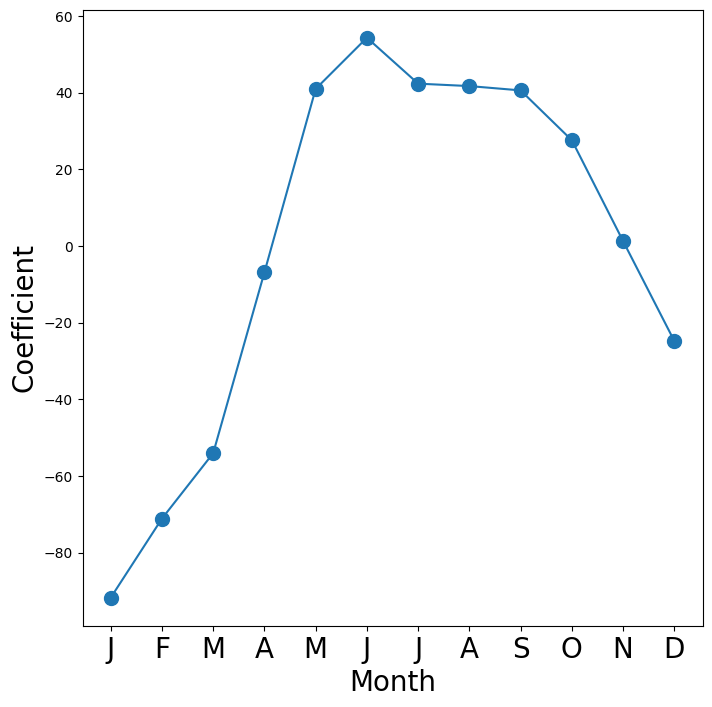

In [330]:
fig_month, ax_month = subplots(figsize=(8, 8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);


In [331]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex([f'hr[{i}]' for i in range(24)])
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()], index=['hr[23]'])])

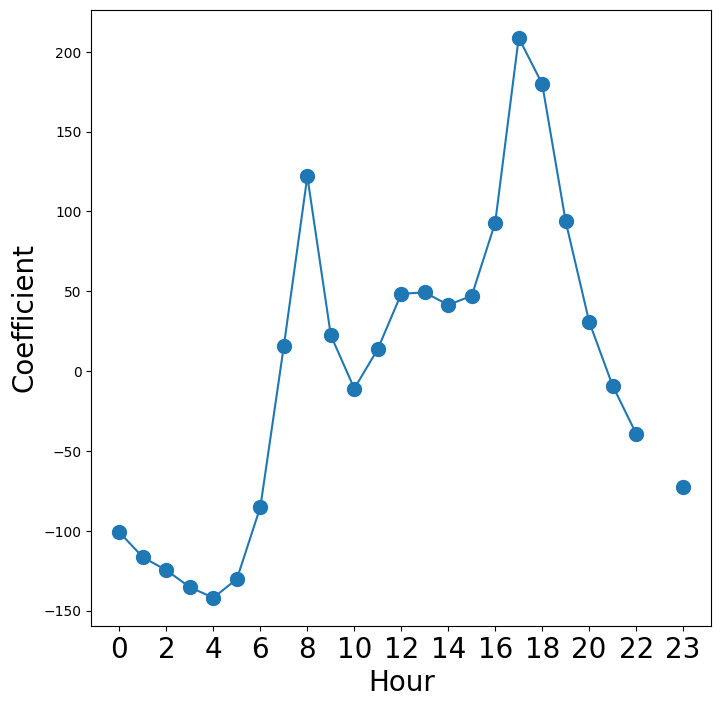

In [332]:
fig_hr, ax_hr = subplots(figsize=(8, 8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels([l.split('[')[1].split(']')[0] for l in coef_hr.index[::2]], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);

In [333]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [334]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()], index=['hr[23]'])])

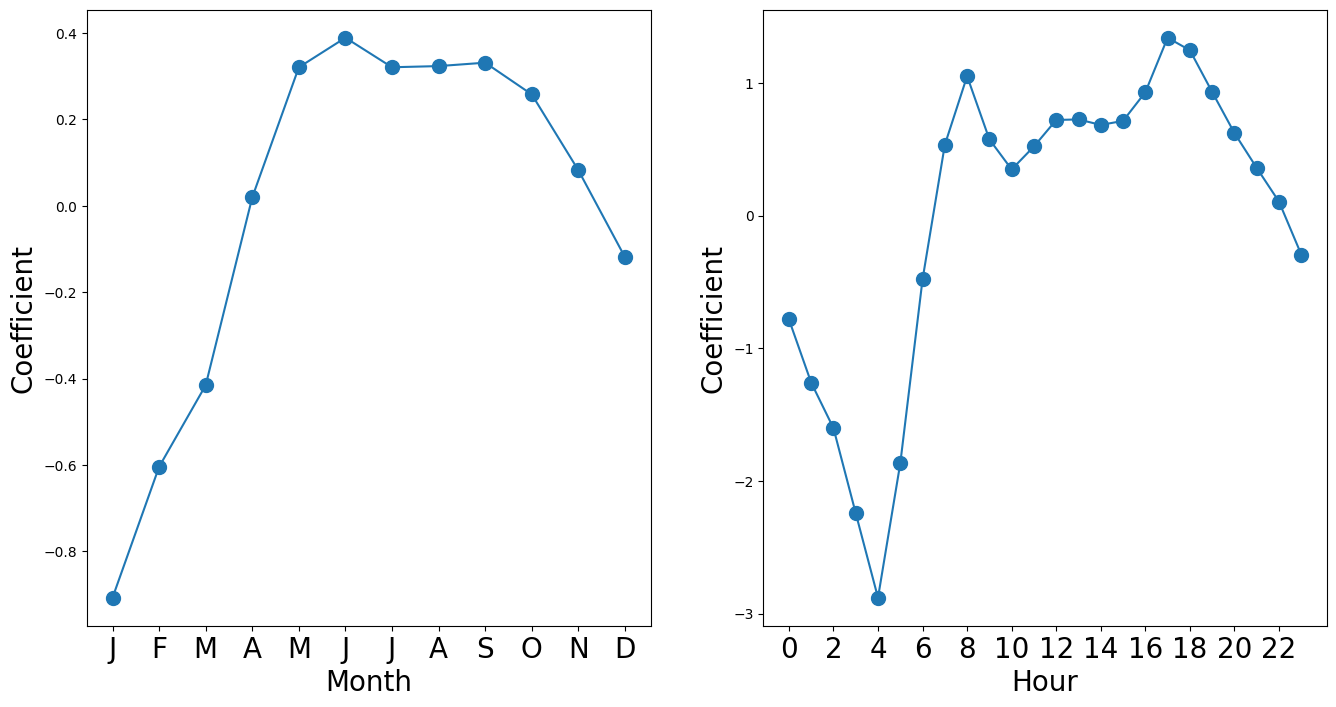

In [335]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16, 8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);

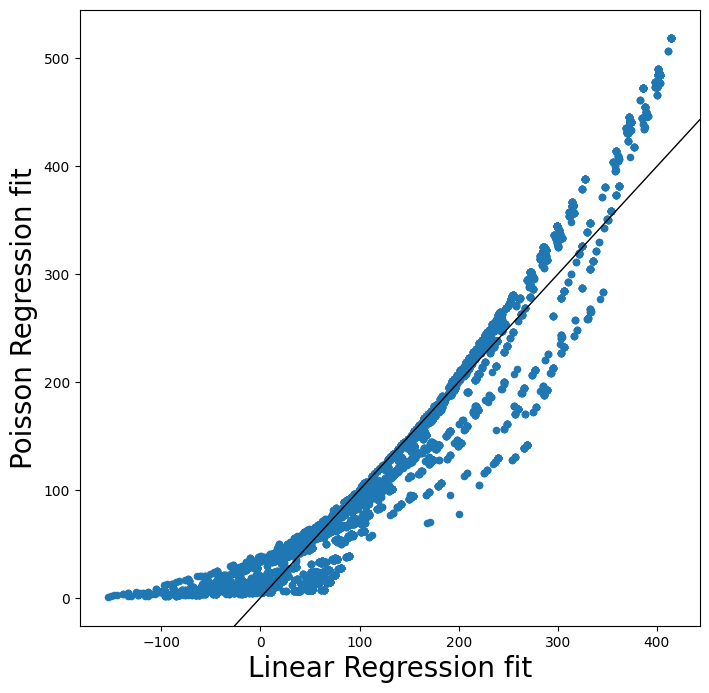

In [336]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(M2_lm.fittedvalues, M_pois.fittedvalues, s=20)
ax.set_xlabel('Linear Regression fit', fontsize=20)
ax.set_ylabel('Poisson Regression fit', fontsize=20)
ax.axline([0, 0], c='black', linewidth=1, slope=1);  # type: ignore